___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright by Pierian Data Inc.</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# K Means Color Quantization

### Imports


In [1]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

### The Image

In [2]:
image_as_array = mpimg.imread('../DATA/palm_trees.jpg')

In [3]:
image_as_array # RGB CODES FOR EACH PIXEL

array([[[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 23,  63,  99],
        [ 51,  91, 127],
        [ 50,  90, 126]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 31,  71, 107],
        [ 48,  88, 124],
        [ 47,  90, 125]],

       [[ 25,  89, 127],
        [ 25,  89, 127],
        [ 25,  89, 127],
        ...,
        [ 39,  79, 115],
        [ 42,  85, 120],
        [ 44,  88, 123]],

       ...,

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [  9,   9,  11],
        [  9,   9,  11]],

       [[  3,   3,   5],
        [  3,   3,   5],
        [  3,   3,   5],
        ...,
        [  8,   8,  10],
        [  8,   8,  10],
        [  8,   8,  10]],

       [[  4,   4,   6],
        [  4,   4,   6],
        [  4,   4,   6],
        ...,
        [  9,   9,  11],
        [ 10,  10,  12],
        [ 10,  10,  12]]

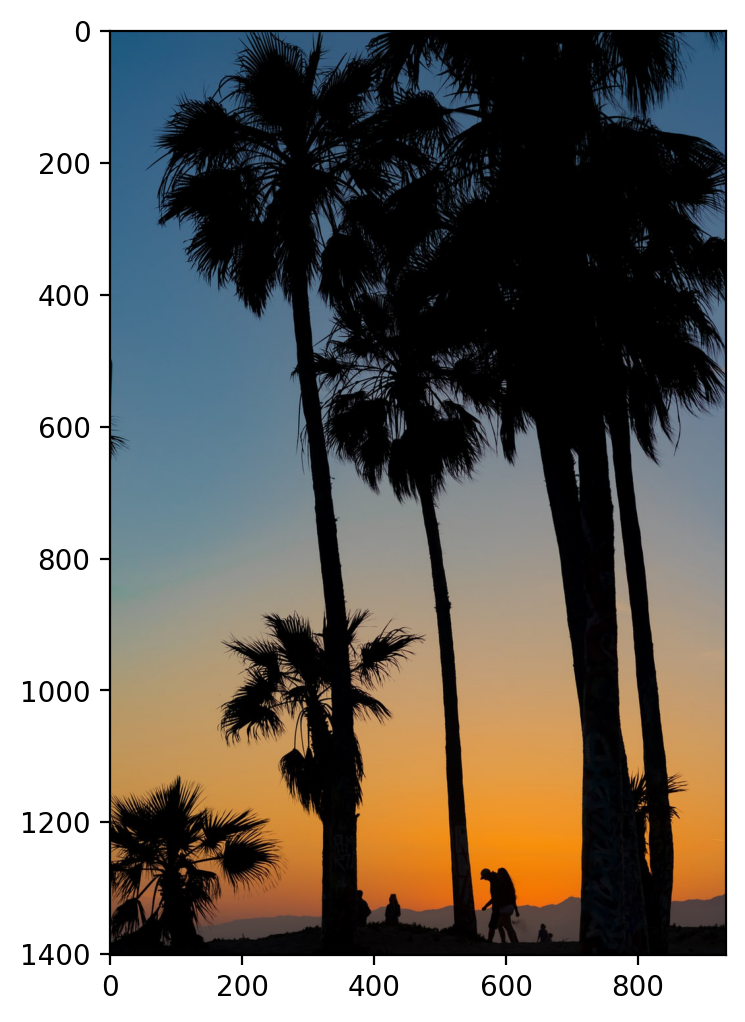

In [4]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(image_as_array)

## Using Kmeans to Quantize Colors

Quantizing colors means we'll reduce the number of unique colors here to K unique colors. Let's try just 6 colors!

In [5]:
image_as_array.shape
# (h,w,3 color channels)

(1401, 934, 3)

### Convert from 3d to 2d

Kmeans is designed to train on 2D data (data rows and feature columns), so we can reshape the above strip by using (h,w,c) ---> (h * w,c)

In [6]:
(h,w,c) = image_as_array.shape

In [7]:
image_as_array2d = image_as_array.reshape(h*w,c)

In [8]:
from sklearn.cluster import KMeans

In [10]:
model = KMeans(n_clusters=8)

In [11]:
model

KMeans()

In [12]:
labels = model.fit_predict(image_as_array2d)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [13]:
labels

array([3, 3, 3, ..., 0, 0, 0])

In [14]:
# THESE ARE THE 8 RGB COLOR CODES!
model.cluster_centers_

array([[  2.58018971,   2.37020687,   3.45624216],
       [100.44888364, 128.8847832 , 146.94303102],
       [227.25548061, 137.52006745,  40.32953505],
       [ 58.73981188,  98.83561297, 130.59600719],
       [154.32267485, 149.6656135 , 139.33931288],
       [ 57.28982591,  55.51630597,  58.98010195],
       [200.50376837, 154.80401453,  99.6583018 ],
       [151.63933851,  96.34880456,  58.15507625]])

In [15]:
rgb_codes = model.cluster_centers_.round(0).astype(int)

In [16]:
rgb_codes

array([[  3,   2,   3],
       [100, 129, 147],
       [227, 138,  40],
       [ 59,  99, 131],
       [154, 150, 139],
       [ 57,  56,  59],
       [201, 155, 100],
       [152,  96,  58]])

In [17]:
quantized_image = np.reshape(rgb_codes[labels], (h, w, c))

In [18]:
quantized_image

array([[[ 59,  99, 131],
        [ 59,  99, 131],
        [ 59,  99, 131],
        ...,
        [ 57,  56,  59],
        [ 59,  99, 131],
        [ 59,  99, 131]],

       [[ 59,  99, 131],
        [ 59,  99, 131],
        [ 59,  99, 131],
        ...,
        [ 59,  99, 131],
        [ 59,  99, 131],
        [ 59,  99, 131]],

       [[ 59,  99, 131],
        [ 59,  99, 131],
        [ 59,  99, 131],
        ...,
        [ 59,  99, 131],
        [ 59,  99, 131],
        [ 59,  99, 131]],

       ...,

       [[  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3],
        ...,
        [  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3]],

       [[  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3],
        ...,
        [  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3]],

       [[  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3],
        ...,
        [  3,   2,   3],
        [  3,   2,   3],
        [  3,   2,   3]]

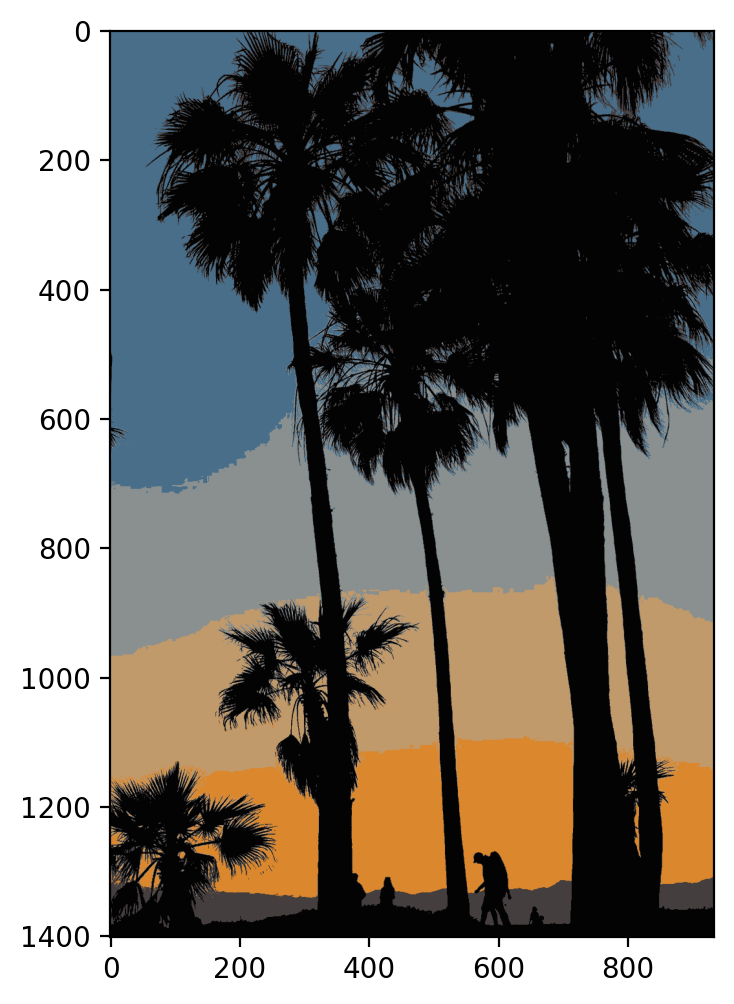

In [79]:
plt.figure(figsize=(6,6),dpi=200)
plt.imshow(quantized_image)